## Pulling the repo

In [1]:
import os
import sys

# --- CONFIGURATION ---
REPO_NAME = "FusionKAN"
# Tip: If private, use: https://<your_token>@github.com/yourname/FusionKAN.git
REPO_URL = "https://github.com/DonKamilo00/FusionKAN.git" 
BRANCH = "main" 

# --- SETUP LOGIC ---
if not os.path.exists(REPO_NAME):
    print(f"🚀 Cloning {REPO_NAME}...")
    !git clone {REPO_URL}
    %cd {REPO_NAME}
else:
    print(f"🔄 Repo exists. Updating...")
    %cd {REPO_NAME}
    !git fetch origin
    !git reset --hard origin/{BRANCH} # Force overwrite local changes to match remote

# --- INSTALL BUILD DEPENDENCIES ---
# Ninja makes C++ compilation much faster
!pip install ninja 

# --- COMPILE & INSTALL FUSIONKAN ---
print("⚙️ Compiling CUDA Kernels (this may take a moment)...")
# --no-deps: Don't waste time checking torch/numpy installation every time
# --force-reinstall: Ensures the C++ extension is actually rebuilt
!pip install . --verbose --no-deps --force-reinstall

print("✅ Setup Complete. FusionKAN is ready.")

🚀 Cloning FusionKAN...
Cloning into 'FusionKAN'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 237 (delta 126), reused 177 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (237/237), 212.23 KiB | 1.74 MiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/FusionKAN
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 7.9 MB/s eta 0:00:00
⚙️ Compiling CUDA Kernels (this may take a moment)...
Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
Processing /content/FusionKAN
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-38ckgn6h/fusion_kan.egg-info
  writing /tmp/pip-pip-egg-info-38ckgn6h/fusion_kan.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-38ckgn6h/fusion_kan.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-38ckgn6h/fusion_kan.

# Saving changes to the .Cu

In [11]:
!git add .
!git commit -m "update kernel"
!git push

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@a4fdbe0801af.(none)')
fatal: could not read Username for 'https://github.com': No such device or address


# Updating

In [14]:
# Run this cell whenever you push changes to GitHub
%cd /content/FusionKAN
!git pull
!pip install . --no-deps --force-reinstall
print("✅ Library Updated")

/content/FusionKAN
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 3), reused 6 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (6/6), 1.49 KiB | 1.49 MiB/s, done.
From https://github.com/DonKamilo00/FusionKAN
   44e6c94..3c8830c  main       -> origin/main
Updating 44e6c94..3c8830c
Fast-forward
 csrc/fusion_kan.cu       | 126 +++++++++++++++++++++++++++--------------------
 fusion_kan/functional.py |   8 +--
 2 files changed, 77 insertions(+), 57 deletions(-)
Processing /content/FusionKAN
  Preparing metadata (setup.py) ... done
  Created wheel for fusion_kan: filename=fusion_kan-1.0.0-cp312-cp312-linux_x86_64.whl size=126257 sha256=ee48b7b52f6427f97c1cf5fb44d2a9752a6f4b7e2dad8b716eb7aaf3ad004cf3
  Stored in directory: /tmp/pip-ephem-wheel-cache-orw1iyqz/wheels/ba/ee/1a/c6dba8d3add4302b13e8353459dd01ef403bc9ab63abe170dd
Successfully built fusion_kan
  Attempting uninstal

✅ Library Updated


# Verification

In [2]:
import torch
import fusion_kan
from fusion_kan import FusionKANLayer

# Verify the C++ backend loaded correctly
try:
    from fusion_kan.functional import _backend
    print("CUDA Backend Loaded Successfully")
except ImportError:
    print("❌ Error: CUDA Backend not found. Did compilation fail?")

# --- Your Benchmark / Test Code Here ---
batch_size = 4096
in_features = 32
out_features = 64

layer = FusionKANLayer(in_features, out_features).cuda()
x = torch.randn(batch_size, in_features).cuda()

# Forward pass
y = layer(x)
print(f"Forward pass output shape: {y.shape}")

# Backward pass (Critical for testing your new kernel gradients)
loss = y.sum()
loss.backward()
print("Backward pass successful")

CUDA Backend Loaded Successfully
Forward pass output shape: torch.Size([4096, 64])
Backward pass successful


In [8]:
!nvidia-smi

Sun Dec  7 13:20:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   62C    P0             32W /   72W |     267MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
# Run this in a Jupyter Cell to recompile
%cd /content/FusionKAN
!pip install . --no-deps --force-reinstall

/content/FusionKAN
Processing /content/FusionKAN
  Preparing metadata (setup.py) ... done
  Created wheel for fusion_kan: filename=fusion_kan-1.0.0-cp312-cp312-linux_x86_64.whl size=119675 sha256=b9442d3ce2e44181933f1e80408647a9a01c45079cbcac081c43b1035a82242d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ex67f069/wheels/ba/ee/1a/c6dba8d3add4302b13e8353459dd01ef403bc9ab63abe170dd
Successfully built fusion_kan
  Attempting uninstall: fusion_kan
    Found existing installation: fusion_kan 1.0.0
    Uninstalling fusion_kan-1.0.0:
      Successfully uninstalled fusion_kan-1.0.0


In [4]:
import torch
import torch.nn as nn
from torch.autograd import gradcheck
import time
import importlib
import fusion_kan
importlib.reload(fusion_kan) # Force reload of the module
from fusion_kan.functional import FusionKANFunction
from fusion_kan.layer import FusionKANLayer

print(f"FusionKAN Version: {fusion_kan.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

def run_gradient_check():
    print("\n--- 1. NUMERICAL CORRECTNESS (GradCheck) ---")
    # gradcheck requires double precision (float64) for numerical stability
    device = torch.device('cuda')
    
    # Small dimensions for valid numerical check
    B, In, Out = 4, 4, 8
    grid_size = 5
    
    # Inputs
    inputs = torch.randn(B, In, dtype=torch.float64, device=device, requires_grad=True)
    weights = torch.randn(Out, In, grid_size + 3, dtype=torch.float64, device=device, requires_grad=True)
    
    # Grid bounds (scalar tensors)
    grid_min = torch.tensor(-1.0, dtype=torch.float64, device=device, requires_grad=True)
    grid_max = torch.tensor(1.0, dtype=torch.float64, device=device, requires_grad=True)
    
    print("Running torch.autograd.gradcheck...")
    try:
        # We test the custom Function directly
        test = gradcheck(
            FusionKANFunction.apply, 
            (inputs, weights, grid_size, grid_min, grid_max), 
            eps=1e-6, 
            atol=1e-4
        )
        print(f"✅ Gradient Check PASSED: {test}")
    except Exception as e:
        print(f"❌ Gradient Check FAILED")
        print(e)

def run_stress_test():
    print("\n--- 2. PERFORMANCE STRESS TEST (Shared Memory Tiling) ---")
    # This tests if the Block/Grid logic holds up under heavy load
    device = torch.device('cuda')
    
    # Large dimensions typical for 3D/NeRF
    B = 16384     # Large Batch
    In = 32       # Typical Coordinate Encoding width
    Out = 64      # Typical Hidden width
    grid_size = 100 # High resolution grid
    
    print(f"Config: Batch={B}, In={In}, Out={Out}, Grid={grid_size}")
    
    layer = FusionKANLayer(In, Out, grid_size=grid_size).to(device)
    x = torch.randn(B, In, device=device)
    
    # Warmup
    for _ in range(10):
        y = layer(x)
        loss = y.sum()
        loss.backward()
        
    torch.cuda.synchronize()
    start = time.time()
    
    steps = 100
    for _ in range(steps):
        # Forward
        y = layer(x)
        # Backward
        loss = y.sum()
        loss.backward()
        
    torch.cuda.synchronize()
    end = time.time()
    
    avg_time = (end - start) / steps * 1000 # ms
    print(f"✅ Stress Test Complete.")
    print(f"Avg Time (Forward+Backward): {avg_time:.2f} ms per step")
    print(f"Throughput: {B * steps / (end - start):,.0f} samples/sec")

def run_convergence_test():
    print("\n--- 3. SANITY CHECK (Training Loop) ---")
    # Simple task: Learn Identity function y = x
    # If gradients are wrong, loss will explode or stay flat.
    
    model = FusionKANLayer(1, 1, grid_size=10).cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    # Data: y = sin(x)
    x_train = torch.linspace(-2, 2, 1000).view(-1, 1).cuda()
    y_train = torch.sin(x_train)
    
    print("Training 50 steps...")
    for i in range(50):
        optimizer.zero_grad()
        pred = model(x_train)
        loss = torch.nn.functional.mse_loss(pred, y_train)
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print(f"Step {i}: Loss {loss.item():.6f}")
            
    if loss.item() < 0.1:
        print("✅ Convergence Check PASSED (Loss < 0.1)")
    else:
        print("⚠️ Convergence Check SUSPICIOUS (Loss is high)")

if __name__ == "__main__":
    run_gradient_check()
    run_stress_test()
    run_convergence_test()

FusionKAN Version: 1.0.0
CUDA Available: True

--- 1. NUMERICAL CORRECTNESS (GradCheck) ---
Running torch.autograd.gradcheck...
✅ Gradient Check PASSED: True

--- 2. PERFORMANCE STRESS TEST (Shared Memory Tiling) ---
Config: Batch=16384, In=32, Out=64, Grid=100
✅ Stress Test Complete.
Avg Time (Forward+Backward): 3.06 ms per step
Throughput: 5,349,813 samples/sec

--- 3. SANITY CHECK (Training Loop) ---
Training 50 steps...
Step 0: Loss 0.195596
Step 10: Loss 0.073179
Step 20: Loss 0.014843
Step 30: Loss 0.002448
Step 40: Loss 0.002647
✅ Convergence Check PASSED (Loss < 0.1)


In [6]:
import torch
from torch.cuda.amp import autocast, GradScaler
from fusion_kan.layer import FusionKANLayer
import time

def test_amp():
    print("\n--- 4. MIXED PRECISION (AMP) TEST ---")
    device = torch.device('cuda')
    
    B, In, Out = 8192, 32, 64
    grid_size = 100
    
    # Init in FP32 (weights stored in FP32 usually, cast to FP16 in autocast)
    model = FusionKANLayer(In, Out, grid_size=grid_size).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scaler = GradScaler()
    
    x = torch.randn(B, In, device=device)
    
    print("Running in Autocast (FP16)...")
    torch.cuda.synchronize()
    start = time.time()
    
    for i in range(10):
        optimizer.zero_grad()
        
        with autocast():
            y = model(x)
            loss = y.sum()
            
        # Scaling gradients prevents underflow in FP16
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
    torch.cuda.synchronize()
    end = time.time()
    
    print(f"✅ AMP Test Complete. Avg Time: {(end-start)/10*1000:.2f} ms")
    
    # Verify weights are still updating
    if model.spline_weight.grad is not None:
        print("✅ Gradients exist (Backward pass worked in FP16)")
    else:
        print("❌ Gradients missing!")

if __name__ == "__main__":
    test_amp()


--- 4. MIXED PRECISION (AMP) TEST ---
Running in Autocast (FP16)...


/tmp/ipython-input-4127704407.py:16: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipython-input-4127704407.py:27: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


✅ AMP Test Complete. Avg Time: 28.46 ms
✅ Gradients exist (Backward pass worked in FP16)


In [ ]:
# Ensure matplotlib is installed
!pip install matplotlib



--- Training FusionKAN SDF on NVIDIA L4 ---
Step 0: Loss 0.259987
Step 100: Loss 0.014772
Step 200: Loss 0.004732
Step 300: Loss 0.002229
Step 400: Loss 0.001280
Step 500: Loss 0.000826
Step 600: Loss 0.000594
Step 700: Loss 0.000467
Step 800: Loss 0.000382
Step 900: Loss 0.000303
Step 1000: Loss 0.000293
Step 1100: Loss 0.000189
Step 1200: Loss 0.000206
Step 1300: Loss 0.000191
Step 1400: Loss 0.000142
Step 1500: Loss 0.000215
Step 1600: Loss 0.000157
Step 1700: Loss 0.000107
Step 1800: Loss 0.000118
Step 1900: Loss 0.000147
Training finished in 12.76s
Generating plot...


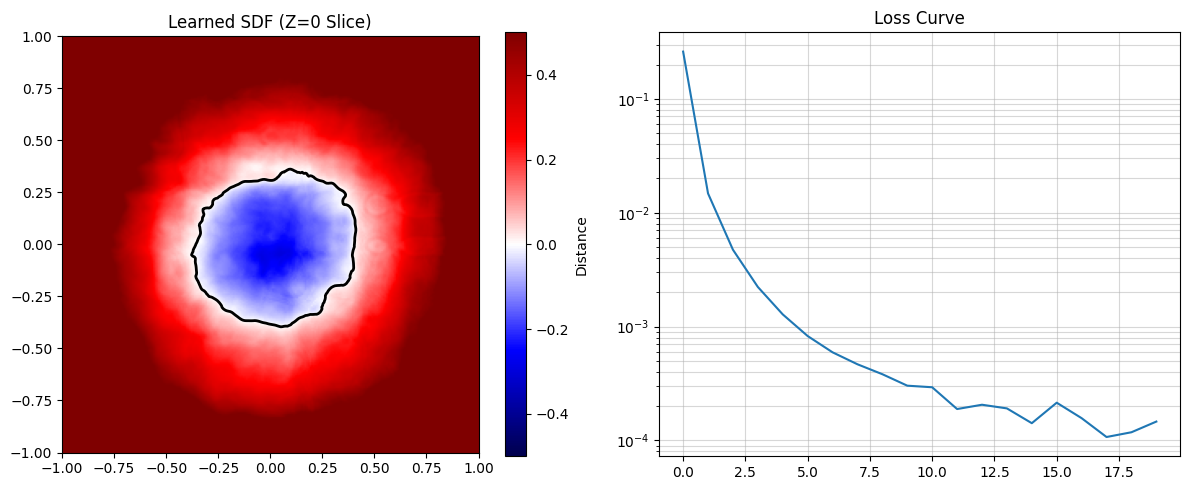

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import time
import matplotlib.pyplot as plt
from torch.amp import autocast, GradScaler
import sys
import os

# Ensure we are using the latest version of the library
import importlib
import fusion_kan
importlib.reload(fusion_kan)
from fusion_kan.layer import FusionKANLayer

# --- 1. MODEL DEFINITION ---
class FusionKANSDF(nn.Module):
    def __init__(self, hidden_dim=64, grid_size=32):
        super().__init__()
        # 3D Inputs (x,y,z) -> Hidden
        self.layer1 = FusionKANLayer(3, hidden_dim, grid_size=grid_size)
        self.layer2 = FusionKANLayer(hidden_dim, hidden_dim, grid_size=grid_size)
        self.layer3 = FusionKANLayer(hidden_dim, 1, grid_size=grid_size, is_output=True)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

def get_sphere_data(batch_size, device):
    coords = (torch.rand(batch_size, 3, device=device) * 2) - 1
    radius = 0.5
    gt_sdf = torch.norm(coords, dim=1, keepdim=True) - radius
    return coords, gt_sdf


def compute_tv_loss(model, lambda_tv=1e-4):
    tv_loss = 0.0
    for layer in [model.layer1, model.layer2, model.layer3]:
        # Weights are [Out, In, Grid+Order]
        # We calculate difference between adjacent grid coefficients: w[..., 1:] - w[..., :-1]
        diff = layer.spline_weight[..., 1:] - layer.spline_weight[..., :-1]
        tv_loss += torch.mean(torch.abs(diff))
    return tv_loss * lambda_tv

# --- 2. TRAINING LOOP ---
device = torch.device('cuda')
print(f"--- Training FusionKAN SDF on {torch.cuda.get_device_name(0)} ---")

model = FusionKANSDF(hidden_dim=32, grid_size=32).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scaler = GradScaler('cuda')

steps = 2000
batch_size = 16384
loss_history = []
start_time = time.time()

for step in range(steps):
    coords, gt_sdf = get_sphere_data(batch_size, device)
    
    optimizer.zero_grad()
    with autocast('cuda'):
        pred_sdf = model(coords)
        mse_loss = torch.nn.functional.mse_loss(pred_sdf, gt_sdf)
        
        # Add TV Regularization
        tv_reg = compute_tv_loss(model, lambda_tv=0.01) 
        loss = mse_loss + tv_reg
    
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
    
    if step % 100 == 0:
        print(f"Step {step}: Loss {loss.item():.6f}")
        loss_history.append(loss.item())

print(f"Training finished in {time.time() - start_time:.2f}s")

# --- 3. VISUALIZATION (Inline) ---
print("Generating plot...")
res = 256
x = np.linspace(-1, 1, res)
y = np.linspace(-1, 1, res)
xv, yv = np.meshgrid(x, y)
zv = np.zeros_like(xv) # Slice at Z=0

grid_coords = np.stack([xv.flatten(), yv.flatten(), zv.flatten()], axis=1)
grid_tensor = torch.tensor(grid_coords, dtype=torch.float32, device=device)

with torch.no_grad():
    pred = model(grid_tensor)
    
pred_grid = pred.cpu().numpy().reshape(res, res)

# Display Plot Inline
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Learned SDF (Z=0 Slice)")
# vmin/vmax centers the colormap so 0 (surface) is white/distinct
plt.imshow(pred_grid, extent=[-1,1,-1,1], origin='lower', cmap='seismic', vmin=-0.5, vmax=0.5)
plt.colorbar(label='Distance')
plt.contour(xv, yv, pred_grid, levels=[0], colors='black', linewidths=2) # Draw the zero-level set

plt.subplot(1, 2, 2)
plt.title("Loss Curve")
plt.plot(loss_history)
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.tight_layout()
plt.show() # This renders the plot in your VS Code / Colab output